In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Analytical Implementation

In [33]:
def analytical_solution(P4=10**5, P1=10**4, rho4=1.0, rho1=0.125, R=287, gamma=1.4, Pr=3.031, plotting=False):

    # Constants
    cv = R / (gamma - 1)
    cp = R + cv
    t = 6.1 * 10**(-3)
    u1 = 0
    u4 = 0

    # Section 1
    P1 = P1
    rho1 = rho1
    T1 = P1 / (rho1 * R)

    a1 = np.sqrt(gamma * R * T1)

    # Section 4
    P4 = P4
    rho4 = rho4
    T4 = P4 / (rho4 * R)

    a4 = np.sqrt(gamma * R * T4)


    # Section 2
    P2 = Pr * P1
    alpha = (gamma + 1) / (gamma - 1)

    rho2 = rho1 * (1 + alpha*Pr) / (alpha + Pr)

    T2 = P2 / (rho2 * R)
    a2 = np.sqrt(gamma * R* T2)

    du_21 = a1 * (Pr - 1) / ((1 + alpha*Pr) * (gamma*(gamma-1)*0.5))**(0.5)

    u2 = u1 + du_21

    # Section 3
    P3 = P2
    u3 = u2

    rho3 = (P3 * rho4**gamma / P4)**(1/gamma)
    T3 = P3 / (rho3 * R)
    a3 = np.sqrt(gamma * R * T3)

    a4 = a3 + (gamma - 1)*u3*0.5
    du_34 = 2*a4*(1 - (P3/P4)**((gamma - 1)/(2*gamma)))/(gamma - 1)
    u4 = u3 - du_34

    # Shock Wave
    W = u1 + (a1**2*(Pr - 1)*(1/gamma)*(1/(u2 - u1)))
    x_shock = W*t

    # Expansion Fan
    x_exp = np.linspace(-a4*t, u3*t - a3*t, 100, endpoint=True)
    u_exp = (2 / (gamma + 1))*(a4 + x_exp/t)
    rho_exp = rho4 * (1 - (gamma-1)*0.5*(u_exp/a4))**(2/(gamma - 1))
    a_exp = a4*(1 - (gamma - 1)*0.5*(u_exp/a4))
    T_exp = T4*(a_exp / a4)**2
    P_exp = rho_exp*R*T_exp

    ######### Results

    x4 = np.linspace(-5, -a4*t, 100, endpoint=True)
    P4_ = P4*np.ones_like(x4)
    rho4_ = rho4*np.ones_like(x4)
    u4_ = u4*np.ones_like(x4)
    T4_ = T4*np.ones_like(x4)

    x3 = np.linspace(u3*t - a3*t, u2*t, 100, endpoint=True)
    P3_ = P3*np.ones_like(x3)
    rho3_ = rho3*np.ones_like(x3)
    u3_ = u3*np.ones_like(x3)
    T3_ = T3*np.ones_like(x3)

    x2 = np.linspace(u2*t, x_shock, 100, endpoint=True)
    P2_ = P2*np.ones_like(x2)
    rho2_ = rho2*np.ones_like(x2)
    u2_ = u2*np.ones_like(x2)
    T2_ = T2*np.ones_like(x2)

    x1 = np.linspace(x_shock, 5, 100, endpoint=True)
    P1_ = P1*np.ones_like(x1)
    rho1_ = rho1*np.ones_like(x1)
    u1_ = u1*np.ones_like(x1)
    T1_ = T1*np.ones_like(x1)

    ######### Locations
  
    print("Expansion Fan (m): ", -a4*t, " to ", u3*t - a3*t)
    print("Shock (m): ", x_shock)
    print("Contact Surface (m): ", u2*t)
  
    ########## Combine Portions

    x_all = np.concatenate((x4, x_exp))
    x_all = np.concatenate((x_all, x3))
    x_all = np.concatenate((x_all, x2))
    x_all = np.concatenate((x_all, x1))

    P_all = np.concatenate((P4_, P_exp))
    P_all = np.concatenate((P_all, P3_))
    P_all = np.concatenate((P_all, P2_))
    P_all = np.concatenate((P_all, P1_))

    rho_all = np.concatenate((rho4_, rho_exp))
    rho_all = np.concatenate((rho_all, rho3_))
    rho_all = np.concatenate((rho_all, rho2_))
    rho_all = np.concatenate((rho_all, rho1_))

    u_all = np.concatenate((u4_, u_exp))
    u_all = np.concatenate((u_all, u3_))
    u_all = np.concatenate((u_all, u2_))
    u_all = np.concatenate((u_all, u1_))

    T_all = np.concatenate((T4_, T_exp))
    T_all = np.concatenate((T_all, T3_))
    T_all = np.concatenate((T_all, T2_))
    T_all = np.concatenate((T_all, T1_))

    ########## Plots

    if plotting:

        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
        fig.suptitle('')
        ax1.plot(x_all, P_all)
        ax1.set_ylabel('Pressure')
        # ax1.set_yticks([np.min(P_all), np.max(P_all)])
        # ax1.set_yticklabels([np.min(P_all), np.max(P_all)])
        ax2.plot(x_all, u_all)
        ax2.set_ylabel('Velocity')
        # ax2.set_yticks([np.min(u_all), np.max(u_all)])
        # ax2.set_yticklabels([np.min(u_all), np.max(u_all)])
        ax3.plot(x_all, rho_all)
        ax3.set_ylabel('Density')
        # ax3.set_yticks([np.min(rho_all), np.max(rho_all)])
        # ax3.set_yticklabels([np.min(rho_all), np.max(rho_all)])
        ax4.plot(x_all, T_all)
        ax4.set_ylabel('Temperature')
        # ax4.set_yticks([np.min(T_all), np.max(T_all)])
        # ax4.set_yticklabels([np.min(T_all), np.max(T_all)])

        plt.show()

    return P_all, u_all, rho_all, T_all, x_all


Expansion Fan (m):  -2.282347356168759  to  -0.1357095190668225
Shock (m):  3.3797303087672534
Contact Surface (m):  1.788864864251614


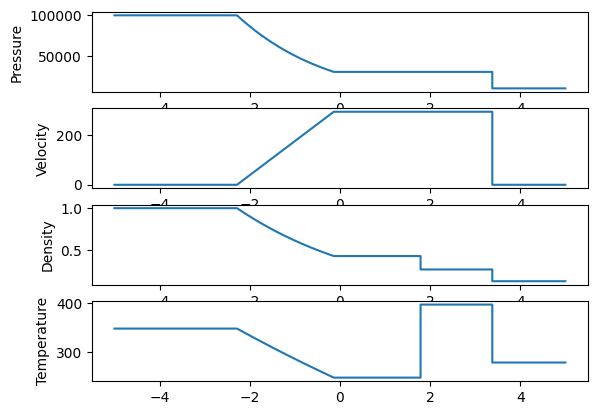

In [34]:
P_an, u_an, rho_an, T_an, x_an = analytical_solution(P4=10**5, P1=10**4, rho4=1.0, rho1=0.125, R=287, gamma=1.4, Pr=3.031, plotting=True)

# Numerical Implementation

In [86]:
def numerical_solution(N_x=21, Cx=0.3, P_high=10**5, P_low=10**4, rho_high=1.0, rho_low=0.125, R=287, gamma=1.4, mu=1.849*10**(-5), prandtl=0.707, order=2, plot_init=False):

    # DEFININIG CONSTANTS FOR NUMERICAL SOLUTION
    tmax = 6.1 * 10**(-3)                           # time to end simulation
    sigma=0.5                                       # CFL number sigma
    x = np.linspace(-5, 5, N_x, endpoint=True)      
    dx = x[1]-x[0]                                  

    # CALCULATING REMAINING PHYSICAL PROPERTIES
    cv = R / (gamma - 1)                            
    cp = R + cv
    k = mu*cp/prandtl

    # INITIALIZING ALL PHYSICAL VARIABLES / PROPERTIES
    u = np.zeros_like(x)                            # velocity

    Press = np.ones_like(x)                         # pressure
    Press[np.where(x<=0)] = P_high
    Press[np.where(x>0)] = P_low

    rho = np.ones_like(x)                           # density
    rho[np.where(x<=0)] = rho_high
    rho[np.where(x>0)] = rho_low

    Temp = np.ones_like(x)                          # temperature
    Temp = Press / (rho * R)

    a = np.sqrt(gamma * R * Temp)                   # speed of sound

    int_e = cv*Temp                                 # internal energy

    # PUTTING TAU_XX, Q_X and DU/DX EQUAL TO 0 INITIALLY
    tau0 = 0
    q0 = 0
    dudx0 = 0

    # PUT PLOT_INT = TRUE IN FUNCTION CALL FOR PLOTTING THE STATE OF SYSTEM AT T = 0
    if plot_init == True:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
        fig.suptitle('Initial Plots')
        ax1.plot(x, Press)
        ax1.set_ylabel('Pressure')
        ax2.plot(x, u)
        ax2.set_ylabel('Velocity')
        ax3.plot(x, rho)
        ax3.set_ylabel('Density')
        plt.show()

    # DEFINING SEPARATE FUNCTIONS FOR COMPUTATION OF EACH VARIABLES

    # This function takes velocity and gives tau_xx
    def tau_xx(u_):
        tau = np.zeros_like(u_)
        for i in range(1, len(tau)-1):
            tau[i] = 4*mu*(u_[i+1] - u_[i-1]) / (2*dx*3)
        return tau

    # This function takes temperature and gives q_x
    def q(T_):
        q_x = np.zeros_like(T_)
        for i in range(1, len(q_x)-1):
            q_x[i] = -k*(T_[i+1] - T_[i-1]) / (2*dx)
        return q_x

    # This function takes velocity and gives du/dx
    def du_by_dx(u_):
        dudx_ = np.zeros_like(u_)
        for i in range(1, len(dudx_)-1):
            dudx_[i] = (u_[i+1] - u_[i-1]) / (2*dx)
        return dudx_

    # This function takes pressure, U, and Cx and computes S
    def compS(P_, U_, Cx):
        St_ = np.zeros_like(U_)
        for i in range(1, len(St_[0, :])-1):
            St_[:, i] = Cx * np.abs(P_[i+1] - 2*P_[i] + P_[i-1]) * (U_[:, i+1] - 2*U_[:, i] + U_[:, i-1]) / (P_[i+1] + 2*P_[i] + P_[i-1])
        return St_

    # This function takes F and computes dF/dx. 
    # Put order = 2 or 4 for 2nd or 4th. 
    # Put scheme = 1 for backward and scheme = 2 for forward 
    # (backward in predictor, forward in corrector)
    def dF_by_dx(F_, scheme, order=2):
        dFdx_ = np.zeros_like(F_)

        if order == 2:

            if scheme == 1:
                # second order backward
                for i in range(1, len(F_[0, :])-1):
                    dFdx_[:, i] = (F_[:, i] - F_[:, i-1]) / dx

            elif scheme == 2:
                # second order forward
                for i in range(1, len(F_[0, :])-1):
                    dFdx_[:, i] = (F_[:, i+1] - F_[:, i]) / dx

        elif order == 4:
            if scheme == 1:
                for i in range(1, len(F_[0, :])-1):
                    if i > 2 and i < len(F_[0, :])-2:
                        # fourth order backward
                        dFdx_[:, i] = (7*F_[:, i] - 8*F_[:, i-1] + F_[:, i-2]) / (6*dx)
                    else:
                        # second order backward
                        dFdx_[:, i] = (F_[:, i] - F_[:, i-1]) / dx

            elif scheme == 2:
                for i in range(1, len(F_[0, :])-1):
                    if i > 2 and i < len(F_[0, :])-2:
                        # fourth order forward
                        dFdx_[:, i] = (-7*F_[:, i] + 8*F_[:, i+1] - F_[:, i+2]) / (6*dx)
                    else:
                        # second order forward 
                        dFdx_[:, i] = (F_[:, i+1] - F_[:, i]) / dx

        return dFdx_

    # This function takes U (or Ubar) and calculates all the physical properties
    # like density (or density_bar), pressure (or pressure_bar) etc.
    def update_physical(U_):
        rho_ = np.zeros_like(x)
        u_ = np.zeros_like(x)
        int_e_ = np.zeros_like(x)
        Temp_ = np.zeros_like(x)
        Press_ = np.zeros_like(x)
        a_ = np.zeros_like(x)

        rho_ = U_[0,:]
        u_ = U_[1,:]/rho_
        int_e_ = U_[2,:]/rho_

        Temp_ = int_e_ / cv

        Press_ = rho_*R*Temp_
        a_ = np.sqrt(gamma * R * Temp_)

        return rho_, u_, int_e_, Temp_, Press_, a_

    # This function takes physical properties and computes F (or F_bar) and J (or J_bar)
    def update_mathematical(rho_, u_, int_e_, T_, P_):

        Ft_ = np.array([rho_*u_, rho_*u_**2 + P_ - tau_xx(u_), rho_*int_e_*u_ + q(T_)])
        Jt_ = np.array([np.zeros_like(rho_), np.zeros_like(rho_), (tau_xx(u_) - P_)*du_by_dx(u_)])

        return Ft_, Jt_

    # This function takes density, velocity and speed of sound 
    # and computes required time step for stability
    def compute_dt(rho_, u_, a_):

        vt = np.zeros_like(rho_)
        for i in range(len(rho_)):
            vt[i] = max(4*mu/(3*rho_[i]), gamma*mu/(prandtl*rho_[i]))

        dt_ = np.min(sigma*(np.abs(u_)/dx + a_/dx + 2*vt/dx**2)**(-1))

        #dt_ = tmax/1001
        return dt_

    # INITIALIZE U, F, J and S
    Ut = np.array([rho, rho*u, rho*int_e])
    Ft = np.array([rho*u, rho*u**2 + Press - tau0, rho*int_e*u + q0])
    Jt = np.array([np.zeros_like(rho), np.zeros_like(rho), (tau0 - Press)*dudx0])
    St = compS(Press, Ut, Cx)

    import copy
    # MAKE COPY OF U, F, J and S TO USE AS PREDICTED / INTERMEDIATE VALUES
    Up = copy.deepcopy(Ut)
    Fp = copy.deepcopy(Ft)
    Jp = copy.deepcopy(Jt)
    Sp = copy.deepcopy(St)

    t_iter = 0
    # STARTING WHILE LOOP WHICH COMPUTES THE PROPERTIES UNTIL T_ITER IS LESS THAN MAX SPECIFIED TIME
    while t_iter < tmax:

        # COMPUTE MY DT FOR CURRENT DENSITY, VELOCITY AND SPEED OF SOUND
        dt = compute_dt(rho, u, a)

        ###### PREDICTOR STEP
        # Get intermediate U
        Up = Ut - dt*dF_by_dx(Ft, scheme=1, order=order) + dt*Jt + St
        # Get intermediate properties
        rho, u, int_e, Temp, Press, a = update_physical(Up)
        # Get intermediate S
        Sp = compS(Press, Up, Cx)
        # Get intermediate F and J
        Fp, Jp = update_mathematical(rho, u, int_e, Temp, Press)

        ###### CORRECTOR STEP
        # Get corrected U
        Ut = 0.5*(Ut + Up - dt*dF_by_dx(Fp, scheme=2, order=order) + dt*Jp) + Sp
        # Get corrected properties
        rho, u, int_e, Temp, Press, a = update_physical(Ut)
        # Get corrected S
        St = compS(Press, Ut, Cx)
        # Get corrected F and J
        Ft, Jt = update_mathematical(rho, u, int_e, Temp, Press)

        # Increment t_iter with dt
        t_iter = t_iter + dt

    # RETURNING ALL PROPERTIES TO FUNCTION CALL
    return x, Press, u, rho, Temp


# Usage of Function for Numerical Solution

x, Pressure, Velocity, Density, Temperture = numerical_solution(N_x, Cx, P_high, P_low, rho_high, rho_low, R, gamma, mu, prandtl, order, plot_init=False)

N_x is grid size

Cx is art. viscosity

P_high is pressure at high end

P_low is pressure at low end

rho_high is density at high pressure end

rho_low is density at low pressure end

R is gas constant

gamma is gas constant equal to cp/cv

mu is dynamic viscosity of gas

prandtl is prandtl number of gas

order is order of scheme for dF/dx (either 2 or 4)

plot_init = True plots the initial properties (helps in debugging)

All properties in standard units

-----------------

_______________

# Running Experiments for Report

________

# Analytical vs Numerical for Case 1 with varying grid

### Experiments conducted with Cx = 0.3 and order = 2nd for all N

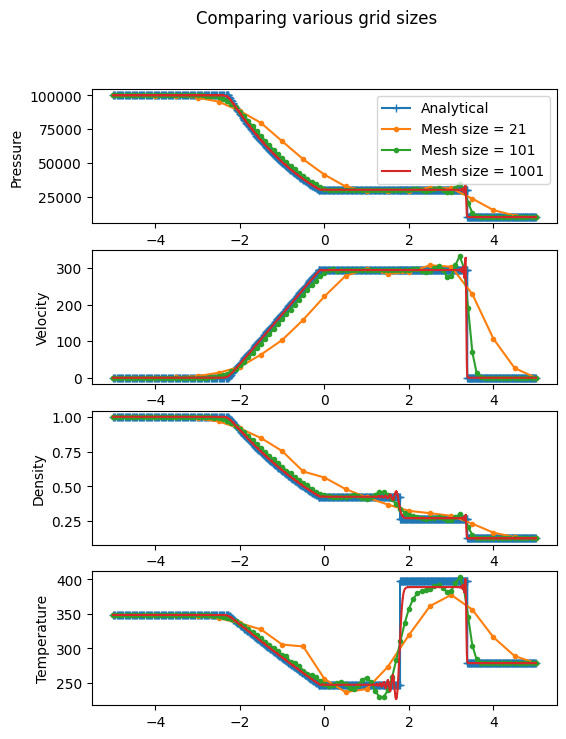

In [91]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 8))
fig.suptitle("Comparing various grid sizes")

marker = '+'
ax1.plot(x_an, P_an, marker=marker, label='Analytical')
ax2.plot(x_an, u_an, marker=marker)
ax3.plot(x_an, rho_an, marker=marker)
ax4.plot(x_an, T_an, marker=marker)

for N in [21, 101, 1001]:
    x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=0.3, P_high=10**5, P_low=10**4, rho_high=1.0, rho_low=0.125, R=287, gamma=1.4, mu=1.849*10**(-5), prandtl=0.707, order=2, plot_init=False)

    marker = '.'
    if N == 1001:
        marker = ','
    ax1.plot(x, Press, marker=marker, label=f'Mesh size = {N}')
    ax1.set_ylabel('Pressure')
    ax2.plot(x, u, marker=marker)
    ax2.set_ylabel('Velocity')
    ax3.plot(x, rho, marker=marker)    
    ax3.set_ylabel('Density')
    ax4.plot(x, Temp, marker=marker)
    ax4.set_ylabel('Temperature')

ax1.legend()
plt.show()

___________

# Comparing 2nd and 4th order for Case 1

### Experiments conducted with Cx = 0.3 for each case

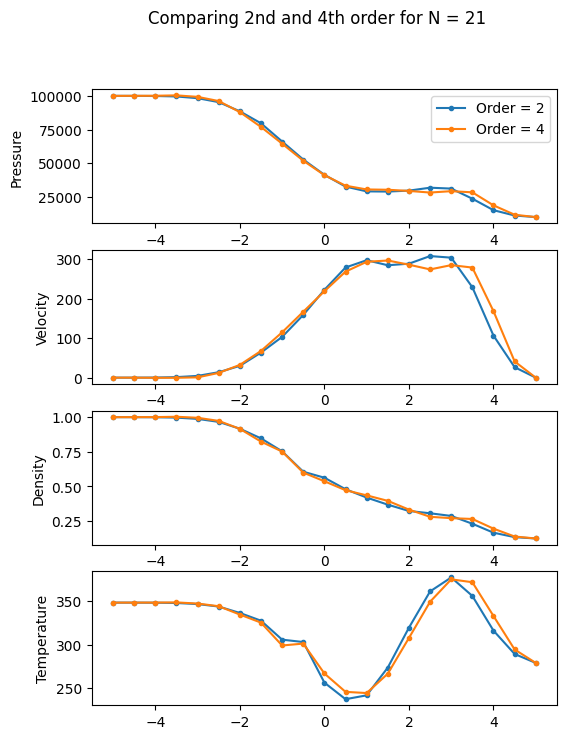

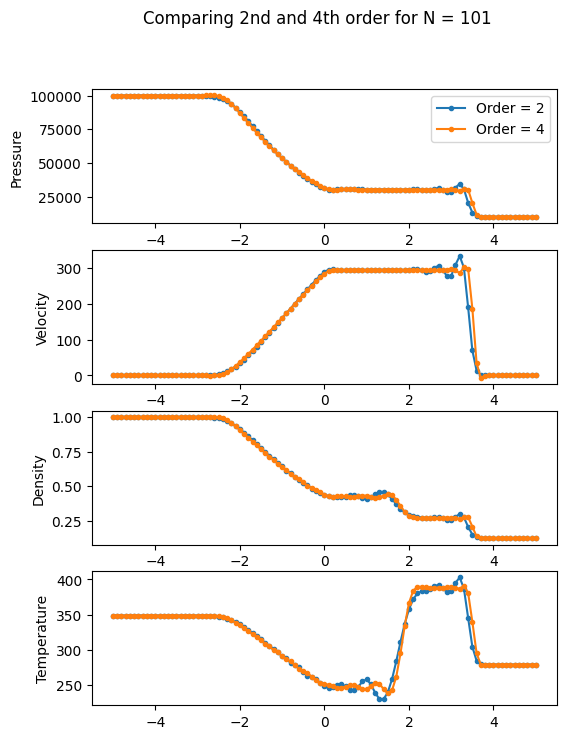

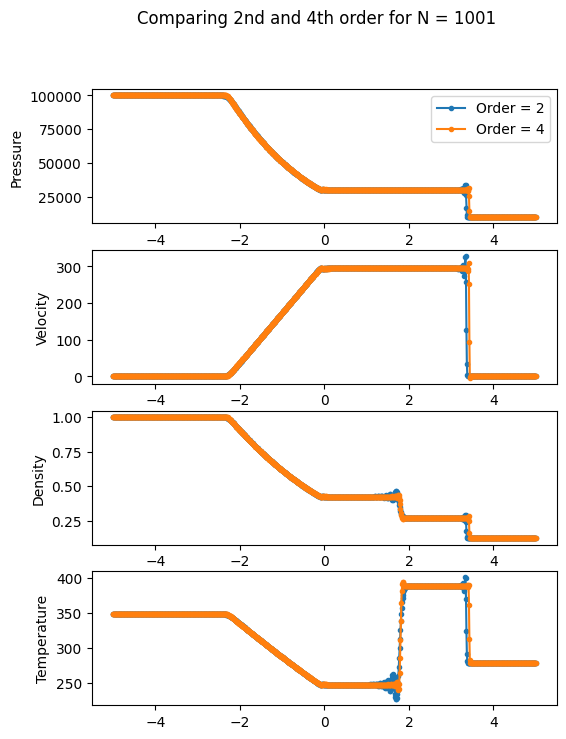

In [63]:
for N in [21, 101, 1001]:

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 8))
    fig.suptitle(f"Comparing 2nd and 4th order for N = {N}")

    for order in [2, 4]:
        x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=0.3, P_high=10**5, P_low=10**4, rho_high=1.0, rho_low=0.125, R=287, gamma=1.4, mu=1.849*10**(-5), prandtl=0.707, order=order, plot_init=False)

        ax1.plot(x, Press, marker='.', label=f'Order = {order}')
        ax1.set_ylabel('Pressure')
        ax2.plot(x, u, marker='.')
        ax2.set_ylabel('Velocity')
        ax3.plot(x, rho, marker='.')    
        ax3.set_ylabel('Density')
        ax4.plot(x, Temp, marker='.')
        ax4.set_ylabel('Temperature')

    ax1.legend()
    plt.show()

_______________________

# Checking effect of Cx for Case 1

### All experiments done for N = 101 and 2nd order scheme

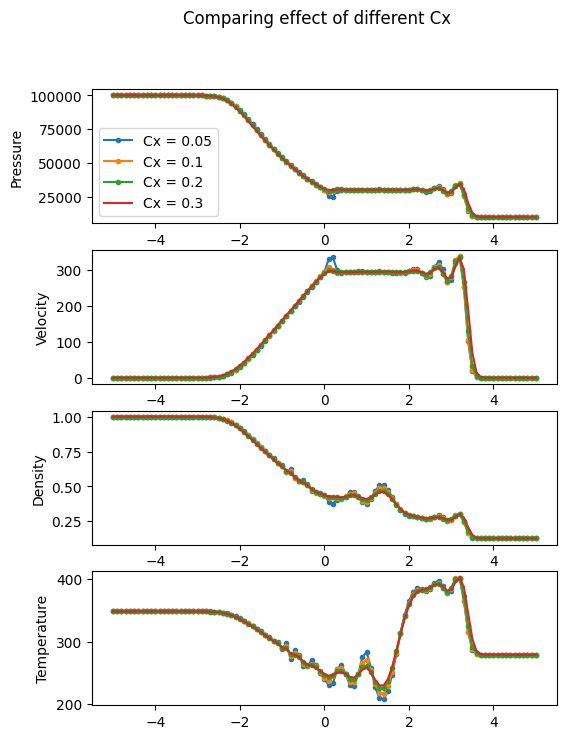

In [73]:
N = 101

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 8))
fig.suptitle(f"Comparing effect of different Cx")

for Cx in [0.05, 0.1, 0.2, 0.3]:
    x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=Cx, P_high=10**5, P_low=10**4, rho_high=1.0, rho_low=0.125, R=287, gamma=1.4, mu=1.849*10**(-5), prandtl=0.707, order=2, plot_init=False)

    marker = '.'
    if Cx == 0.3:
        marker = ','
    ax1.plot(x, Press, marker=marker, label=f'Cx = {Cx}')
    ax1.set_ylabel('Pressure')
    ax2.plot(x, u, marker=marker)
    ax2.set_ylabel('Velocity')
    ax3.plot(x, rho, marker=marker)    
    ax3.set_ylabel('Density')
    ax4.plot(x, Temp, marker=marker)
    ax4.set_ylabel('Temperature')

ax1.legend()
plt.show()

__________________________

# Compare Case 1, 2 and 3

### All experiments done with Cx = 0.3 and N = 101 with 2nd order

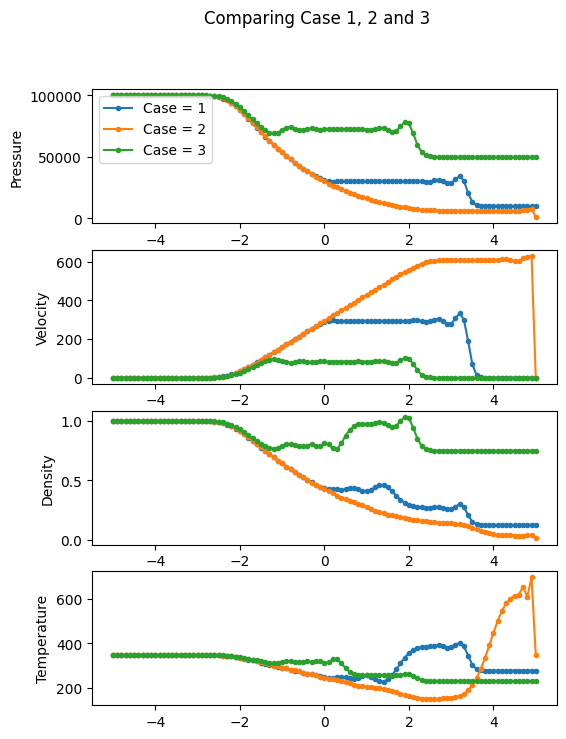

In [74]:
N = 101
Cx = 0.3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 8))
fig.suptitle(f"Comparing Case 1, 2 and 3")

for Case in [1, 2, 3]:

    # P1 and rho1 are different in each case. Rest properties are same.

    if Case == 1:
        x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=Cx, P_high=10**5, P_low=10**4, \
            rho_high=1.0, rho_low=0.125, R=287, gamma=1.4, mu=1.849*10**(-5), \
            prandtl=0.707, order=2, plot_init=False)
    elif Case == 2:
        x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=Cx, P_high=10**5, P_low=10**3, \
            rho_high=1.0, rho_low=0.01, R=287, gamma=1.4, mu=1.849*10**(-5), \
            prandtl=0.707, order=2, plot_init=False)
    elif Case == 3:
        x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=Cx, P_high=10**5, P_low=5*10**4, \
            rho_high=1.0, rho_low=0.75, R=287, gamma=1.4, mu=1.849*10**(-5), \
            prandtl=0.707, order=2, plot_init=False)

    marker = '.'
    ax1.plot(x, Press, marker=marker, label=f'Case = {Case}')
    ax1.set_ylabel('Pressure')
    ax2.plot(x, u, marker=marker)
    ax2.set_ylabel('Velocity')
    ax3.plot(x, rho, marker=marker)    
    ax3.set_ylabel('Density')
    ax4.plot(x, Temp, marker=marker)
    ax4.set_ylabel('Temperature')

ax1.legend()
plt.show()

_____________________________

# Comparing Case 1 and 4

### All experiments done for N = 101 and Cx = 0.3 with 2nd order

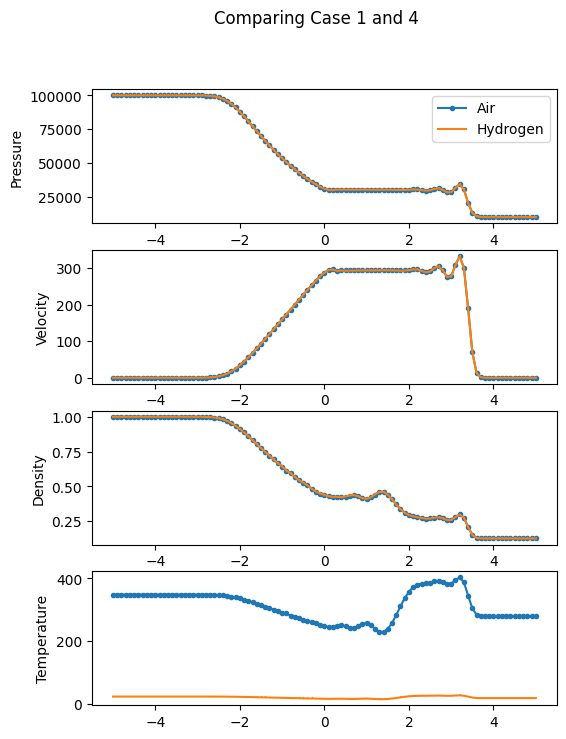

In [93]:
N = 101
Cx = 0.3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 8))
fig.suptitle(f"Comparing Case 1 and 4")

for Case in [1, 4]:

    # P1 and rho1 are different in each case. Rest properties are same.

    if Case == 1:
        gas = 'Air'
        x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=Cx, P_high=10**5, P_low=10**4, \
            rho_high=1.0, rho_low=0.125, R=287, gamma=1.4, mu=1.849*10**(-5), \
            prandtl=0.707, order=2, plot_init=False)
    elif Case == 4:
        gas = 'Hydrogen'
        
        x, Press, u, rho, Temp = numerical_solution(N_x=N, Cx=Cx, P_high=10**5, P_low=10**4, \
            rho_high=1.0, rho_low=0.125, R=4124, gamma=1.405, mu=8.85*10**(-6), \
            prandtl=0.701, order=2, plot_init=False)
        
    marker = '.'
    if Case == 4:
        marker = ','
    ax1.plot(x, Press, marker=marker, label=f'{gas}')
    ax1.set_ylabel('Pressure')
    ax2.plot(x, u, marker=marker)
    ax2.set_ylabel('Velocity')
    ax3.plot(x, rho, marker=marker)    
    ax3.set_ylabel('Density')
    ax4.plot(x, Temp, marker=marker)
    ax4.set_ylabel('Temperature')

ax1.legend()
plt.show()

_________________________